<a href="https://colab.research.google.com/github/gabxrosa/hotel-booking-analysis/blob/main/Hotel_booking_demand_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando Bibliotecas

In [1]:
## Importando as bibliotecas necessárias para a análise do projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura dos arquivos  (*Google Drive*)

In [2]:
df_hotel_booking = pd.read_csv('/content/drive/MyDrive/Data Analysis /Database/hotel_bookings.csv')

In [3]:
# Mostrar as primeiras linhas do df
pd.set_option('display.max_columns', None)
df_hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Conhecendo os dados

In [4]:
# Conhecendo os valores não nulos e tipos de dados por colunas
df_hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Conhecendo os valores nulos
df_hotel_booking.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [6]:
# Trazer estatísticas do dataframe
df_hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Observação:

As colunas is_canceled, agent, company não são numéricas.

## Tratando os dados

In [7]:
# Substituir 0 e 1 na coluna de status de cancelamento
df_hotel_booking['is_canceled'] = df_hotel_booking['is_canceled'].replace([0,1],['Not canceled','Canceled'])

In [8]:
# Substituir 0 e 1 na coluna is_repeated_guest
df_hotel_booking['is_repeated_guest'] = df_hotel_booking['is_repeated_guest'].replace([0,1],['No','Yes'])

In [9]:
# Substituir o tipo de refeição na coluna meal
# Undefined – no meal package;
# SC - no meal package;
# BB – Bed & Breakfast;
# HB – Half board (breakfast and one other meal – usually dinner);
# FB – Full board (breakfast, lunch and dinner)
df_hotel_booking['meal'] = df_hotel_booking['meal'].replace(['Undefined','SC','BB','HB','FB'],['No Meal','No Meal','Bed & Breakfast','Half Board','Full Board'])


In [10]:
df_hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Not canceled,342,2015,July,27,1,0,0,2,0.0,0,Bed & Breakfast,PRT,Direct,Direct,No,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,Not canceled,737,2015,July,27,1,0,0,2,0.0,0,Bed & Breakfast,PRT,Direct,Direct,No,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,Not canceled,7,2015,July,27,1,0,1,1,0.0,0,Bed & Breakfast,GBR,Direct,Direct,No,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,Not canceled,13,2015,July,27,1,0,1,1,0.0,0,Bed & Breakfast,GBR,Corporate,Corporate,No,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,Not canceled,14,2015,July,27,1,0,2,2,0.0,0,Bed & Breakfast,GBR,Online TA,TA/TO,No,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
# Converter tipos de dados
df_hotel_booking['reservation_status_date'] = pd.to_datetime(df_hotel_booking['reservation_status_date']).dt.date
df_hotel_booking['children'] = df_hotel_booking['children'].fillna(0).astype(int)
df_hotel_booking['agent'] = df_hotel_booking['agent'].fillna(0).astype(object)
df_hotel_booking['company'] = df_hotel_booking['company'].fillna(0).astype(object)

In [12]:
df_hotel_booking.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
df_hotel_booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Not canceled,342,2015,July,27,1,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,No,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,Not canceled,737,2015,July,27,1,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,No,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,Not canceled,7,2015,July,27,1,0,1,1,0,0,Bed & Breakfast,GBR,Direct,Direct,No,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,Not canceled,13,2015,July,27,1,0,1,1,0,0,Bed & Breakfast,GBR,Corporate,Corporate,No,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,Not canceled,14,2015,July,27,1,0,2,2,0,0,Bed & Breakfast,GBR,Online TA,TA/TO,No,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,Not canceled,23,2017,August,35,30,2,5,2,0,0,Bed & Breakfast,BEL,Offline TA/TO,TA/TO,No,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,Not canceled,102,2017,August,35,31,2,5,3,0,0,Bed & Breakfast,FRA,Online TA,TA/TO,No,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,Not canceled,34,2017,August,35,31,2,5,2,0,0,Bed & Breakfast,DEU,Online TA,TA/TO,No,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,Not canceled,109,2017,August,35,31,2,5,2,0,0,Bed & Breakfast,GBR,Online TA,TA/TO,No,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Visualizações (*Insights*)

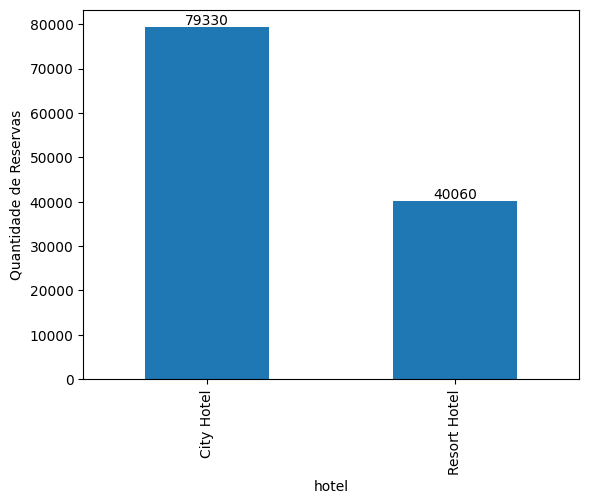

In [14]:
# Gráfico de Barras: Quantidade de reservas por tipo de hotel
df_hotel_booking['hotel'].value_counts()

plt.xlabel('Hotel')
plt.ylabel('Quantidade de Reservas')

df_hotel_booking['hotel'].value_counts().plot(kind='bar')

# Adicionar rótulos de dados
for i, j in enumerate(df_hotel_booking['hotel'].value_counts()):
    plt.text(i, j, str(j), ha='center', va='bottom')

plt.show()

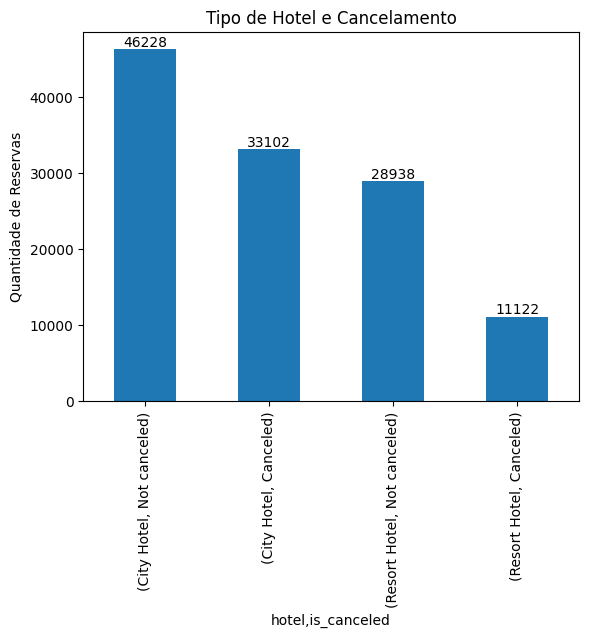

In [15]:
# Gráfico de Barras: Quantidade de cancelamentos por tipo de hotel

plt.title('Tipo de Hotel e Cancelamento')
plt.xlabel('Hotel e Cancelado ou Não')
plt.ylabel('Quantidade de Reservas')

# Usar as cores da paleta Pastel1

df_hotel_booking[['hotel','is_canceled']].value_counts().plot(kind='bar')

# Adicionar rótulos de dados
for i, j in enumerate(df_hotel_booking[['hotel','is_canceled']].value_counts()):
    plt.text(i, j, str(j), ha='center', va='bottom')

plt.show()

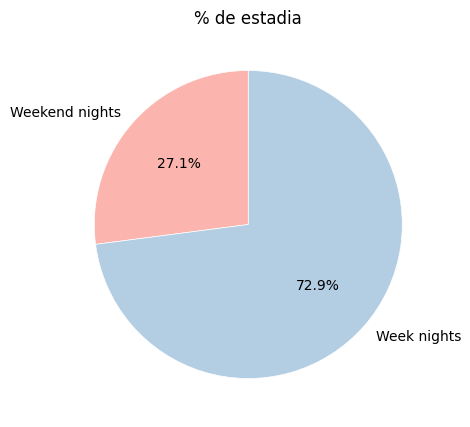

In [16]:
# Gráfico de Pizza: Quantidade total de noites
total_nights = [df_hotel_booking['stays_in_weekend_nights'].sum(), df_hotel_booking['stays_in_week_nights'].sum()]

plt.figure(figsize=(5,5))
plt.pie(total_nights, labels = ['Weekend nights','Week nights'], autopct='%1.1f%%', wedgeprops={'linewidth': 0.5, 'edgecolor':'white'}, startangle=90, colors = plt.cm.Pastel1.colors)
plt.title('% de estadia')
plt.show()

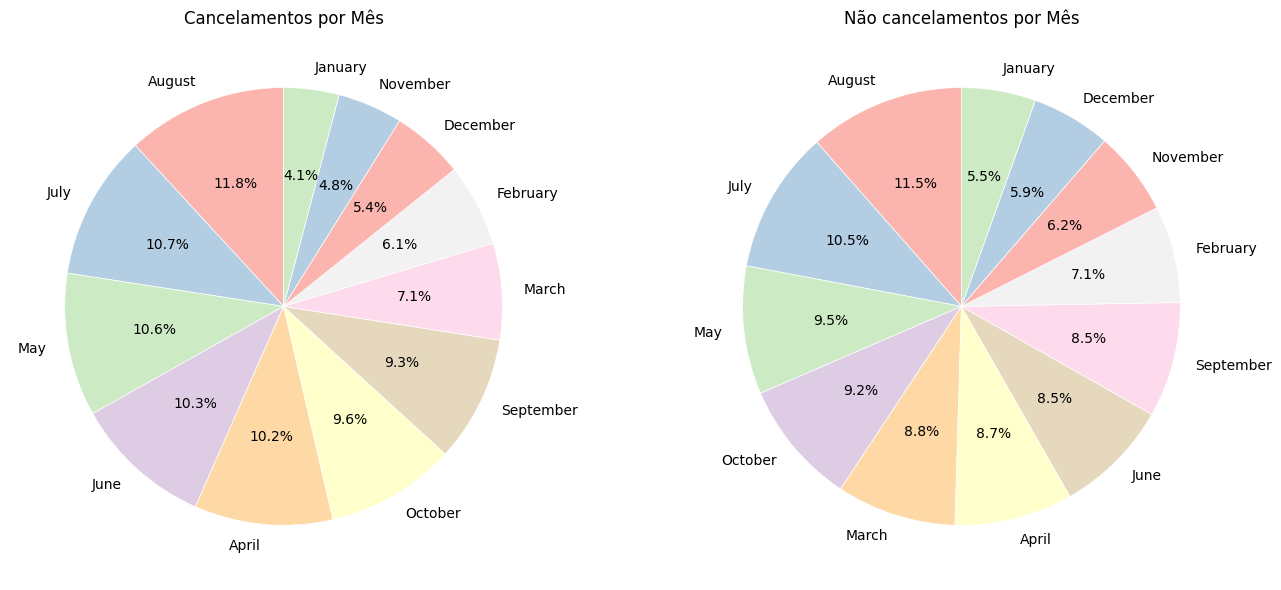

In [17]:
# Gráfico de Pizza: Quantidade de não cancelamentos e cancelamentos por mês
canceled_data = df_hotel_booking[df_hotel_booking['is_canceled'] == 'Canceled'].sort_index()
not_canceled_data = df_hotel_booking[df_hotel_booking['is_canceled'] == 'Not canceled'].sort_index()

# Conta por mês
canceled_month = canceled_data['arrival_date_month'].value_counts()
not_canceled_month = not_canceled_data['arrival_date_month'].value_counts()

# Gráfico para cancelamentos
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(canceled_month, labels = canceled_month.index, autopct='%1.1f%%', wedgeprops={'linewidth': 0.5, 'edgecolor':'white'}, startangle=90, colors = plt.cm.Pastel1.colors)
plt.title('Cancelamentos por Mês')

# Gráfico para não cancelamentos
plt.subplot(1,2,2)
plt.pie(not_canceled_month, labels = not_canceled_month.index, autopct='%1.1f%%', wedgeprops={'linewidth': 0.5, 'edgecolor':'white'}, startangle=90, colors = plt.cm.Pastel1.colors)
plt.title('Não cancelamentos por Mês')

plt.tight_layout()
plt.show()

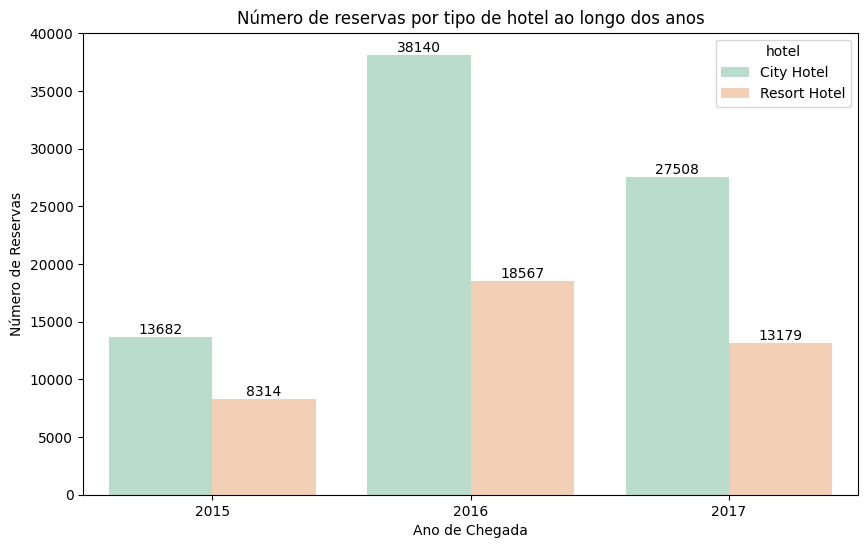

In [18]:
# Gráfico de Barras: Número de reservas por tipo de hotel ao longo dos anos

# Agrupar por ano e tipo de hotel e contar as reservas
reservas_por_ano_hotel = df_hotel_booking.groupby(['arrival_date_year', 'hotel']).size().reset_index(name='numero_reservas')

plt.figure(figsize=(10,6))

ax = sns.barplot(data=reservas_por_ano_hotel, x='arrival_date_year', y='numero_reservas', hue='hotel', palette='Pastel2')
plt.title('Número de reservas por tipo de hotel ao longo dos anos')
plt.xlabel('Ano de Chegada')
plt.ylabel('Número de Reservas')

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container)

plt.show()

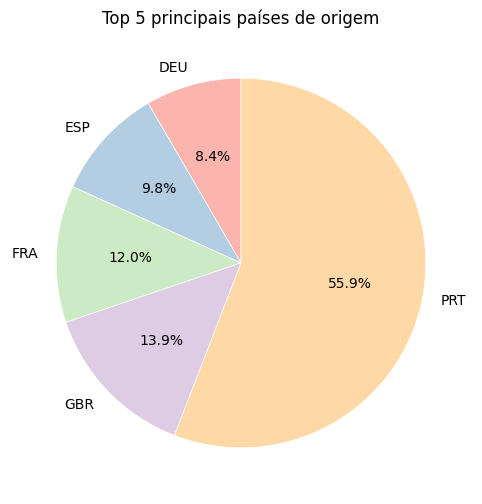

In [19]:
# Reservas por País de origem
top_five_countries = df_hotel_booking['country'].value_counts().head(5).sort_values()

plt.figure(figsize=(10,6))
plt.pie(top_five_countries, labels=top_five_countries.index, autopct='%1.1f%%', wedgeprops={'linewidth': 0.5, 'edgecolor':'white'}, startangle=90, colors = plt.cm.Pastel1.colors)

plt.title('Top 5 principais países de origem')

plt.show()

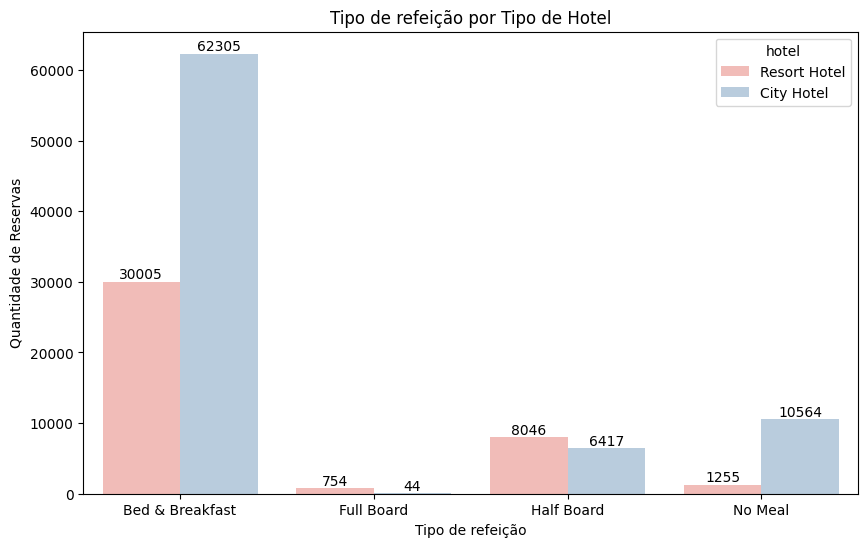

In [20]:
# Gráfico de barras: Tipo de refeição por Tipo de Hotel
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_hotel_booking, x='meal', hue='hotel', palette='Pastel1')
plt.title('Tipo de refeição por Tipo de Hotel')
plt.xlabel('Tipo de refeição')
plt.ylabel('Quantidade de Reservas')


# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container)

plt.show()